In [1]:
import numpy as np
import pandas as pd
import math
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA
from scipy.stats import rankdata, norm, gaussian_kde
import matplotlib.pyplot as plt
from random import randrange

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
filename = "real_world_data/airline_dataset.csv"
data = pd.read_csv(filename)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Airline,Flight,Time,Length,Delay
0,0,b'CO',269.0,15.0,205.0,1
1,1,b'US',1558.0,15.0,222.0,1
2,2,b'AA',2400.0,20.0,165.0,1
3,3,b'AA',2466.0,20.0,195.0,1
4,4,b'AS',108.0,30.0,202.0,0


In [3]:
train = df.iloc[:179794,:]
test = df.iloc[179794:,:]

te = TargetEncoder(cols=["Airline"], smoothing=0, return_df=False)

X_train = train.drop(columns=["Delay", "Unnamed: 0"])
X_test = test.drop(columns=["Delay", "Unnamed: 0"])

y_train = train[["Delay"]]
y_test = test[["Delay"]]

X_train = te.fit_transform(X_train, y_train)
X_test = te.transform(X_test)

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(179794, 4)
(359589, 4)
(179794, 1)
(359589, 1)


,0,1,2,3
0,0.658216,0.034306,0.003499,0.312977
1,0.220048,0.199309,0.003499,0.338931
2,0.365433,0.307092,0.006998,0.251908
3,0.365433,0.315540,0.006998,0.297710
4,0.281152,0.013697,0.013996,0.308397


In [4]:
# models = []

# k_range = range(1500, 2220, 3)

# k_scores = []

# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k)
#     models.append(model)
#     score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5).mean()
#     print(k, score)
#     k_scores.append(score) 

# plt.plot(k_range, k_scores)
# plt.show()

# model_knn = KNeighborsClassifier(n_neighbors=27)
# np.mean(cross_val_score(model_knn, X_train, y_train.values.ravel(), cv=5))

In [5]:
# Cross-validation 20 times with randomly selected sequential leave-17k-out to measure the expected accuracy

cross_val_scores = []

for n in range(20):
    test_start = randrange(0, 179794 - 17000)
    test_end = test_start + 17000
    print(test_start, test_end)
    
    cross_val_y_test = y_train.iloc[test_start:test_end,:]
    cross_val_y_train_1 = y_train.iloc[:test_start,:]
    cross_val_y_train_2 = y_train.iloc[test_end:,:]
    cross_val_y_train = np.concatenate([cross_val_y_train_1, cross_val_y_train_2], axis=0)
    
    cross_val_X_test = X_train.iloc[test_start:test_end,:]
    cross_val_X_train_1 = X_train.iloc[:test_start,:]
    cross_val_X_train_2 = X_train.iloc[test_end:,:]
    cross_val_X_train = np.concatenate([cross_val_X_train_1, cross_val_X_train_2], axis=0)
    
    cross_val_model = KNeighborsClassifier(n_neighbors=2066)
    cross_val_model.fit(cross_val_X_train, cross_val_y_train.ravel())
    cval_score = cross_val_model.score(cross_val_X_test, cross_val_y_test)
    print(cval_score, '\n')
    cross_val_scores.append(cval_score)

np.mean(cross_val_scores)

64410 81410
0.6786470588235294 

74266 91266
0.6404705882352941 

32958 49958
0.7356470588235294 

77605 94605
0.6451764705882352 

139007 156007
0.6829411764705883 

124479 141479
0.7111176470588235 

27280 44280
0.7291176470588235 

94787 111787
0.6932352941176471 

30343 47343
0.7332352941176471 

65204 82204
0.6770588235294117 

5083 22083
0.6494705882352941 

139212 156212
0.6831176470588235 

93375 110375
0.6901176470588235 

3713 20713
0.6358823529411765 

740 17740
0.6175294117647059 

83154 100154
0.6481176470588236 

23526 40526
0.7274705882352941 

106204 123204
0.7257058823529412 

159395 176395
0.6902941176470588 

107880 124880
0.7262941176470589 



0.6860323529411765

In [6]:
X_test_batches = []
y_test_batches = []

i = 0
while i < len(X_test):
    new_i = i + 17000
    if new_i > len(X_test):
        new_i = len(X_test)
    X_test_batches.append(X_test[i: new_i])
    y_test_batches.append(y_test[i: new_i])
    i = new_i

print(len(X_test_batches))
print(X_test_batches[0].shape)
print(y_test_batches[0].shape)
print(X_test_batches[-1].shape)
print(y_test_batches[-1].shape)

22
(17000, 4)
(17000, 1)
(2589, 4)
(2589, 1)


In [7]:
# models = [
#     model_knn,
#     model_rf,
#     model_svm,
#     model_pc,
#     model_lr
# ]

accs = []

# # 2066-1500 /3 ~= 189 (choose K~=2066)
# for i in range(1):
#     model = models[189]

#     model.fit(X_train, y_train.values.ravel())

#     accs.append([])

#     for batch in range(len(X_test_batches)):
#         accs[i].append(model.score(X_test_batches[batch], y_test_batches[batch]))

#     print(accs[i])

model_knn = KNeighborsClassifier(n_neighbors=2066)
model_knn.fit(X_train, y_train.values.ravel())
for batch in range(len(X_test_batches)):
    batch_score = model_knn.score(X_test_batches[batch], y_test_batches[batch])
    print('\n', batch_score)
    if batch_score < np.mean(cross_val_scores):
        print("drift in batch", batch + 1)
    accs.append(batch_score)


 0.6768823529411765
drift in batch 1

 0.5410588235294118
drift in batch 2

 0.5933529411764706
drift in batch 3

 0.6549411764705882
drift in batch 4

 0.6359411764705882
drift in batch 5

 0.5557058823529412
drift in batch 6

 0.5799411764705882
drift in batch 7

 0.5723529411764706
drift in batch 8

 0.6188235294117647
drift in batch 9

 0.5821176470588235
drift in batch 10

 0.5560588235294117
drift in batch 11

 0.5469411764705883
drift in batch 12

 0.6228235294117647
drift in batch 13

 0.6546470588235294
drift in batch 14

 0.6307058823529412
drift in batch 15

 0.5641176470588235
drift in batch 16

 0.6132352941176471
drift in batch 17

 0.5584705882352942
drift in batch 18

 0.5244117647058824
drift in batch 19

 0.5387647058823529
drift in batch 20

 0.575
drift in batch 21

 0.5731942835071456
drift in batch 22


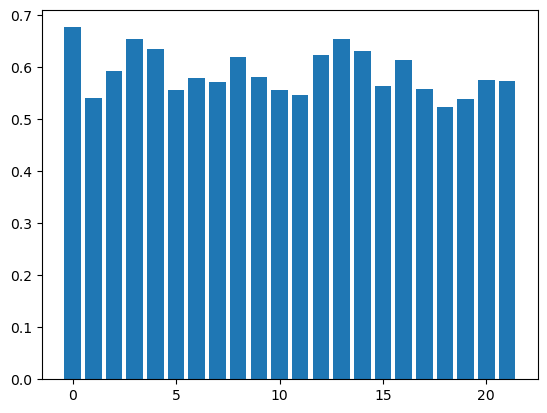

In [8]:
plt.bar(range(0, len(X_test_batches)), accs)
plt.show()